 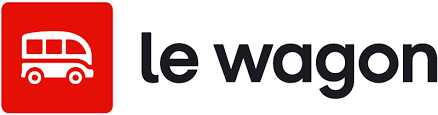

# Financial returns

## Data discovery

a) Execute cell below to load financial data into `df` variable

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

b) Describe data.

In [ ]:
df

,Date,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction
0,2015-02-17,127.489998,128.880005,126.919998,127.830002,63152400,122.905254,106.741052,117.927667,129.114281,Increasing
1,2015-02-18,127.629997,128.779999,127.449997,128.720001,44891700,123.760965,107.842423,118.940333,130.038244,Increasing
2,2015-02-19,128.479996,129.029999,128.330002,128.449997,37362400,123.501363,108.894245,119.889167,130.884089,Decreasing
3,2015-02-20,128.619995,129.500000,128.050003,129.500000,48948400,124.510914,109.785449,120.763500,131.741551,Increasing
4,2015-02-23,130.020004,133.000000,129.660004,133.000000,70974100,127.876074,110.372516,121.720167,133.067817,Increasing
...,...,...,...,...,...,...,...,...,...,...,...
501,2017-02-10,132.460007,132.940002,132.050003,132.119995,20065500,132.119995,114.494004,124.498666,134.503328,Decreasing
502,2017-02-13,133.080002,133.820007,132.750000,133.289993,23035400,133.289993,114.820798,125.205166,135.589534,Increasing
503,2017-02-14,133.470001,135.089996,133.250000,135.020004,32815500,135.020004,115.175718,125.953499,136.731280,Increasing
504,2017-02-15,135.520004,136.270004,134.619995,135.509995,35501600,135.509995,115.545035,126.723499,137.901963,Decreasing


Apple stock data.

c) Use `.describe()` method to get statical summary of the columns

In [ ]:
df.describe(include="all")

,Date,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction
count,506,506.000000,506.000000,506.000000,506.000000,5.060000e+02,506.000000,506.000000,506.000000,506.000000,506
unique,506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,2015-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Increasing
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,278
mean,NaN,112.935000,113.919447,111.942016,112.958340,4.317842e+07,110.459312,107.311385,112.739865,118.168345,NaN
std,NaN,11.287490,11.251892,11.263687,11.244744,1.985253e+07,10.537529,11.095804,10.595315,10.670752,NaN
min,NaN,90.000000,91.669998,89.470001,90.339996,1.147590e+07,89.008370,85.508858,94.047166,97.572721,NaN
25%,NaN,105.482500,106.349999,104.657501,105.672499,2.974240e+07,103.484803,97.011245,104.954875,111.052267,NaN
50%,NaN,112.889999,114.145001,111.800003,113.025002,3.747460e+07,110.821123,107.351628,112.799750,118.472542,NaN
75%,NaN,122.267498,123.497500,121.599998,122.179998,5.076395e+07,119.255457,114.812152,121.889416,128.515793,NaN


d) Convert `Date` column to datetime and set it as index.

In [ ]:
df["Date"] = pd.to_datetime(df["Date"], format='%Y-%m-%d')
df = df.set_index("Date")

e) The `value_counts()` method is very useful when working with series. You can consult its [documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html).

Count the number of rows per day of the week using this function on index. 
What do you notice?

Hint: `.dayofweek` is an attribute of a datetime object

In [ ]:
df.index.dayofweek.value_counts()

1    105
2    105
3    103
4     99
0     94
Name: Date, dtype: int64

There are no saturday and sunday. It's normal because stock exchange is closed during weekends.

f) Still on the index, use `isocalendar()` method. What do you obtain ?

In [ ]:
df.index.isocalendar()

,year,week,day
Date,,,
2015-02-17,2015,8,2
2015-02-18,2015,8,3
2015-02-19,2015,8,4
2015-02-20,2015,8,5
2015-02-23,2015,9,1
...,...,...,...
2017-02-10,2017,6,5
2017-02-13,2017,7,1
2017-02-14,2017,7,2


It gives year, week of year and day of week. Isocalendar format lets you do complex period over period comparisons easily. 

g) Display data in January and December

Hint: use method `.isin()` to filter on several values passed as a list

In [ ]:
mask = df.index.month.isin([1, 12])
df[mask]

,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction
Date,,,,,,,,,,
2015-12-01,118.750000,118.809998,116.860001,117.339996,34852400,114.290588,112.795765,118.078000,123.360235,Decreasing
2015-12-02,117.339996,118.110001,116.080002,116.279999,33386600,113.258137,112.863291,117.806500,122.749709,Decreasing
2015-12-03,116.550003,116.790001,114.220001,115.199997,41569500,112.206202,112.900608,117.452667,122.004726,Decreasing
2015-12-04,115.290001,119.250000,115.110001,119.029999,57777000,115.936671,113.069761,117.279333,121.488905,Increasing
2015-12-07,118.980003,119.860001,117.809998,118.279999,32084200,115.206161,113.278621,117.153666,121.028712,Decreasing
...,...,...,...,...,...,...,...,...,...,...
2017-01-25,120.419998,122.099998,120.279999,121.879997,32377600,121.353858,115.170446,118.446500,121.722554,Increasing
2017-01-26,121.669998,122.440002,121.599998,121.940002,26337600,121.413604,115.123567,118.687000,122.250433,Increasing
2017-01-27,122.139999,122.349998,121.599998,121.949997,20562900,121.423555,115.190236,118.935667,122.681098,Decreasing


## Resampling and returns

a) Use resample function to calculate `AAPL.Open` minimum value and `AAPL.Close` median value per quarter.

Hint: When using more than one aggregate function, use `.agg()` method.

In [ ]:
df.resample("Q").agg({"AAPL.Open": "min", "AAPL.Close": "median"})

,AAPL.Open,AAPL.Close
Date,,
2015-03-31,122.309998,127.139999
2015-06-30,124.470001,127.599998
2015-09-30,94.870003,115.274998
2015-12-31,106.959999,114.365002
2016-03-31,93.129997,98.529999
2016-06-30,90.000000,97.635002
2016-09-30,94.599998,107.210003
2016-12-31,106.570000,113.540001
2017-03-31,115.800003,121.489998


b) Use `pct_change()` method on column `AAPL.Close` to calculate daily returns. It's very common when you want to elaborate strategies.

In [ ]:
df["AAPL.Close"].pct_change()


Date
2015-02-17         NaN
2015-02-18    0.006962
2015-02-19   -0.002098
2015-02-20    0.008174
2015-02-23    0.027027
                ...   
2017-02-10   -0.002266
2017-02-13    0.008856
2017-02-14    0.012979
2017-02-15    0.003629
2017-02-16   -0.001181
Name: AAPL.Close, Length: 506, dtype: float64

c) What does this instruction do?

Imagine the time saved in comparison with excel...

In [ ]:
df.resample("QS")[["AAPL.Open", "AAPL.Close"]].first().pct_change(4)

,AAPL.Open,AAPL.Close
Date,,
2015-01-01,NaN,NaN
2015-04-01,NaN,NaN
2015-07-01,NaN,NaN
2015-10-01,NaN,NaN
2016-01-01,-0.195153,-0.175859
2016-04-01,-0.128505,-0.114769
2016-07-01,-0.247518,-0.242575
2016-10-01,0.033373,0.026830
2017-01-01,0.128545,0.102515


Annual return caculated from first days of quarters.

d) Deduce how to calculate mean `AAPL.Close` value evolution calculated quartely start.

In [ ]:
df.resample("QS")[["AAPL.Close"]].mean().pct_change()

,AAPL.Close
Date,
2015-01-01,NaN
2015-04-01,0.006952
2015-07-01,-0.083123
2015-10-01,-0.025609
2016-01-01,-0.128122
2016-04-01,-0.002547
2016-07-01,0.065038
2016-10-01,0.071155
2017-01-01,0.095504


e) Period over Period return is complex. How do you compare first day first week between two years ? Below, we calculate Apple's yearly sliding return in isodate. 

Take your time and make sure you understand it perfectly.

In [ ]:
df.groupby([df.index.isocalendar().day, df.index.isocalendar().week])[["AAPL.Close"]].pct_change()

,AAPL.Close
Date,
2015-02-17,NaN
2015-02-18,NaN
2015-02-19,NaN
2015-02-20,NaN
2015-02-23,NaN
...,...
2017-02-10,0.405681
2017-02-13,NaN
2017-02-14,0.397144


## Window functions

a) Calculate `AAPL.Close` moving average over the last 4 rolling days.

In [ ]:
df["AAPL.Close"].rolling(4).mean()

Date
2015-02-17           NaN
2015-02-18           NaN
2015-02-19           NaN
2015-02-20    128.625000
2015-02-23    129.917499
                 ...    
2017-02-10    132.027496
2017-02-13    132.467495
2017-02-14    133.212497
2017-02-15    133.984997
2017-02-16    134.792499
Name: AAPL.Close, Length: 506, dtype: float64

b) A very interesting feature in Python is to be able to specify a time window and not simply a number of previous rows.

Repeat the previous question using a sliding 30-day window. 

In [ ]:
df["AAPL.Close"].rolling(window="30D").mean()

Date
2015-02-17    127.830002
2015-02-18    128.275002
2015-02-19    128.333333
2015-02-20    128.625000
2015-02-23    129.500000
                 ...    
2017-02-10    124.362856
2017-02-13    125.330998
2017-02-14    125.792379
2017-02-15    126.234089
2017-02-16    126.931817
Name: AAPL.Close, Length: 506, dtype: float64

## Missing values

Weekend days do not appear in this data. 

We will generate a new DataFrame by adding them and leaving NaN as default values.

a) Create a column-free DataFrame `df_with_weekends` with dates from `2015-02-17` to `2017-02-16` including weekends as index. 

Study the `pd.date_range()` function for this.

The different possible offsets can be found in [this documentation](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases)

In [ ]:
df_with_weekends = pd.DataFrame(index=pd.date_range("2015-02-17", "2017-02-16 ", freq="D"))
df_with_weekends

""
2015-02-17
2015-02-18
2015-02-19
2015-02-20
2015-02-21
...
2017-02-12
2017-02-13
2017-02-14
2017-02-15


b) Add `df` data to this new DataFrame with `pd.merge()` function. Look at parameters left_index and right_index.

In [ ]:
df_with_weekends = pd.merge(df_with_weekends, df, left_index=True, right_index=True, how="left")
df_with_weekends.head(20)

,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction
2015-02-17,127.489998,128.880005,126.919998,127.830002,63152400.0,122.905254,106.741052,117.927667,129.114281,Increasing
2015-02-18,127.629997,128.779999,127.449997,128.720001,44891700.0,123.760965,107.842423,118.940333,130.038244,Increasing
2015-02-19,128.479996,129.029999,128.330002,128.449997,37362400.0,123.501363,108.894245,119.889167,130.884089,Decreasing
2015-02-20,128.619995,129.500000,128.050003,129.500000,48948400.0,124.510914,109.785449,120.763500,131.741551,Increasing
2015-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-23,130.020004,133.000000,129.660004,133.000000,70974100.0,127.876074,110.372516,121.720167,133.067817,Increasing
2015-02-24,132.940002,133.600006,131.169998,132.169998,69228100.0,127.078049,111.094869,122.664834,134.234798,Decreasing
2015-02-25,131.559998,131.600006,128.149994,128.789993,74711700.0,123.828261,113.211918,123.629667,134.047415,Decreasing
2015-02-26,128.789993,130.869995,126.610001,130.419998,91287500.0,125.395469,114.165299,124.282333,134.399367,Increasing


c) Now study the [fillna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna) method, replace the missing values with next valid value. Don't replace `df_with_weekends`.

What are the other replacement options?

In [ ]:
df_with_weekends.fillna(method="bfill")

,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction
2015-02-17,127.489998,128.880005,126.919998,127.830002,63152400.0,122.905254,106.741052,117.927667,129.114281,Increasing
2015-02-18,127.629997,128.779999,127.449997,128.720001,44891700.0,123.760965,107.842423,118.940333,130.038244,Increasing
2015-02-19,128.479996,129.029999,128.330002,128.449997,37362400.0,123.501363,108.894245,119.889167,130.884089,Decreasing
2015-02-20,128.619995,129.500000,128.050003,129.500000,48948400.0,124.510914,109.785449,120.763500,131.741551,Increasing
2015-02-21,130.020004,133.000000,129.660004,133.000000,70974100.0,127.876074,110.372516,121.720167,133.067817,Increasing
...,...,...,...,...,...,...,...,...,...,...
2017-02-12,133.080002,133.820007,132.750000,133.289993,23035400.0,133.289993,114.820798,125.205166,135.589534,Increasing
2017-02-13,133.080002,133.820007,132.750000,133.289993,23035400.0,133.289993,114.820798,125.205166,135.589534,Increasing
2017-02-14,133.470001,135.089996,133.250000,135.020004,32815500.0,135.020004,115.175718,125.953499,136.731280,Increasing
2017-02-15,135.520004,136.270004,134.619995,135.509995,35501600.0,135.509995,115.545035,126.723499,137.901963,Decreasing


d) We want to fill in the missing values by **interpolation** instead. 

Study the DataFrame `interpolate()` method and do it. You can update the result in `df_with_weekends` variable.

In [ ]:
df_with_weekends = df_with_weekends.interpolate()

,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction
2015-02-17,127.489998,128.880005,126.919998,127.830002,6.315240e+07,122.905254,106.741052,117.927667,129.114281,Increasing
2015-02-18,127.629997,128.779999,127.449997,128.720001,4.489170e+07,123.760965,107.842423,118.940333,130.038244,Increasing
2015-02-19,128.479996,129.029999,128.330002,128.449997,3.736240e+07,123.501363,108.894245,119.889167,130.884089,Decreasing
2015-02-20,128.619995,129.500000,128.050003,129.500000,4.894840e+07,124.510914,109.785449,120.763500,131.741551,Increasing
2015-02-21,129.086665,130.666667,128.586670,130.666667,5.629030e+07,125.632634,109.981138,121.082389,132.183640,NaN
...,...,...,...,...,...,...,...,...,...,...
2017-02-12,132.873337,133.526672,132.516668,132.899994,2.204543e+07,132.899994,114.711866,124.969666,135.227465,NaN
2017-02-13,133.080002,133.820007,132.750000,133.289993,2.303540e+07,133.289993,114.820798,125.205166,135.589534,Increasing
2017-02-14,133.470001,135.089996,133.250000,135.020004,3.281550e+07,135.020004,115.175718,125.953499,136.731280,Increasing
2017-02-15,135.520004,136.270004,134.619995,135.509995,3.550160e+07,135.509995,115.545035,126.723499,137.901963,Decreasing


e) Combining `date_range` and `merge` functions is not the optimal solution. But these functions are very useful in other cases.

We will study a new function: `asfreq`. Read [documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.asfreq.html).

Using this function, create a new DataFrame with weekend days from `df` DataFrame.




In [ ]:
df.asfreq("D")

,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction
Date,,,,,,,,,,
2015-02-17,127.489998,128.880005,126.919998,127.830002,63152400.0,122.905254,106.741052,117.927667,129.114281,Increasing
2015-02-18,127.629997,128.779999,127.449997,128.720001,44891700.0,123.760965,107.842423,118.940333,130.038244,Increasing
2015-02-19,128.479996,129.029999,128.330002,128.449997,37362400.0,123.501363,108.894245,119.889167,130.884089,Decreasing
2015-02-20,128.619995,129.500000,128.050003,129.500000,48948400.0,124.510914,109.785449,120.763500,131.741551,Increasing
2015-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2017-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-13,133.080002,133.820007,132.750000,133.289993,23035400.0,133.289993,114.820798,125.205166,135.589534,Increasing
2017-02-14,133.470001,135.089996,133.250000,135.020004,32815500.0,135.020004,115.175718,125.953499,136.731280,Increasing


f) This function also allows you to apply a lower frequency than the data frequency, in this case the day.

Create a new DataFrame with a frequency of 6h from `df`.


In [ ]:
df.asfreq("6H")

,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction
Date,,,,,,,,,,
2015-02-17 00:00:00,127.489998,128.880005,126.919998,127.830002,63152400.0,122.905254,106.741052,117.927667,129.114281,Increasing
2015-02-17 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-17 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-17 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-18 00:00:00,127.629997,128.779999,127.449997,128.720001,44891700.0,123.760965,107.842423,118.940333,130.038244,Increasing
...,...,...,...,...,...,...,...,...,...,...
2017-02-15 00:00:00,135.520004,136.270004,134.619995,135.509995,35501600.0,135.509995,115.545035,126.723499,137.901963,Decreasing
2017-02-15 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-15 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Financial charts

a) Execute cell below to load data from multiple tickers. Note that values have been rebased on day one. It means that you see return instead of ticker value.

In [ ]:
df = px.data.stocks()

df["date"] = pd.to_datetime(df["date"], format='%Y-%m-%d', errors='coerce')
df = df.set_index("date")
df

,GOOG,AAPL,AMZN,FB,NFLX,MSFT
date,,,,,,
2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708
...,...,...,...,...,...,...
2019-12-02,1.216280,1.546914,1.425061,1.075997,1.463641,1.720717
2019-12-09,1.222821,1.572286,1.432660,1.038855,1.421496,1.752239
2019-12-16,1.224418,1.596800,1.453455,1.104094,1.604362,1.784896


b) Display GOOG ticker evolution with a line plot

In [ ]:
fig = px.line(df, x=df.index, y="GOOG", title="GOOG evolution")
fig.show()

c) Display the evolution of the GOOG index with its minimum and maximum cumulative value.

Look at the `cummin` and `cummax` methods. To add a line to a Plotly chart, use fig.add_scatter() function.

In [ ]:
fig = px.line(df[["GOOG"]], x=df.index, y="GOOG", title="GOOG evolution")
fig.add_scatter(x=df.index, y=df["GOOG"].cummin(), name="Cumin", mode='lines')
fig.add_scatter(x=df.index, y=df["GOOG"].cummax(), name="Cummax", mode='lines')
fig.show()

d) Display in the same chart the evolution of the GOOG index and the 10-day, 30-day and 70-day moving averages.

In [ ]:
fig = px.line(df[["GOOG"]], x=df.index, y="GOOG", title="GOOG evolution")
fig.add_scatter(x=df.index, y=df["GOOG"].rolling(window="10D").mean(), name="moving avg 10D", mode='lines')
fig.add_scatter(x=df.index, y=df["GOOG"].rolling(window="30D").mean(), name="moving avg 30D", mode='lines')
fig.add_scatter(x=df.index, y=df["GOOG"].rolling(window="70D").mean(), name="moving avg 70D", mode='lines')
fig.show()

We now want to use faceplots argument to display returns  for each index in separate charts.

e) Using the function `pd.melt()` transform `df` into a two-column DataFrame. The first one with the name of the corresponding indices (ticker column) and the second one with the value (value column).

The result will be stored in a variable `df_melt`.

In [ ]:
df_melt = pd.melt(df, var_name="ticker", ignore_index=False)
df_melt

,ticker,value
date,,
2018-01-01,GOOG,1.000000
2018-01-08,GOOG,1.018172
2018-01-15,GOOG,1.032008
2018-01-22,GOOG,1.066783
2018-01-29,GOOG,1.008773
...,...,...
2019-12-02,MSFT,1.720717
2019-12-09,MSFT,1.752239
2019-12-16,MSFT,1.784896


f) Use `px.area()` function and display returns for each ticker in a separate chart.

In [ ]:
fig = px.area(df_melt, y=df_melt.value - 1, facet_col="ticker", color="ticker", facet_col_wrap=2)
fig.show() 